# Integração numérica: Regra dos Trapézios
> Ao final desta leitura, você deve compreender os princípios da integração numérica pelo método dos trapézios. Desde os conceitos básicos, passando por exemplos de algoritmos de implementação, até uma descrição de como usar SciPy, uma biblioteca Python para cálculo científico.

- toc: true
- badges: true
- comments: true
- author: Felipe N. Schuch
- image: images/trapezoidal-rule.png
- categories: [SciPy, métodos muméricos]

# Introdução

A operação integral é, de maneira geral, representada pela seguinte equação:
\\[
\int_a^b f(x)dx.
\\]

No contexto geométrico, essa operação é capaz de calcular a área sob a curva \\( f(x) \\), para o intervalo \\( a \le x \le b \\). Muitas das funções mais conhecidas apresentam uma integral definida, isso é, podem ser calculadas de forma analítica, e essas definições aparecem em [Tabelas de Integrais](https://www.if.ufrgs.br/tex/fisica-4/tab-integrais.pdf) ou em utilitários de álgebra simbólica ([SymPy](https://www.sympy.org/pt/index.html), por exemplo).

Existem casos onde a solução analítica não é possível, já que a função é de elevada complexidade ou mesmo desconhecida, e aí podemos recorrer aos métodos numéricos.

In [1]:
#hide

# Esse bloco modifica alguns dos valores padrões para
# apresentação das figuras

import matplotlib.pyplot as plt

plt.rcdefaults()

# https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot')

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
plt.rcParams.update({'figure.dpi' : 75,
                     "figure.figsize" : (6, 6),
                     "axes.formatter.limits" : (-8, 8)
                    })

In [2]:
#hide

'''
Se reproduzir esse conteúdo em partes ou em
sua totalidade, forneça um link para o
material original:
https://fschuch.github.io/aprenda.py/blog/trapezoidal-rule.html

E por favor, apoie os nossos autores:
https://twitter.com/fschuch
'''
def copyright():
    plt.annotate('© 2020 Aprenda.py, por F. N. Schuch',
                 xy=(0.5,0.01),
                 xycoords='axes fraction',
                 ha='center', va='bottom');

In [3]:
#hide

# Esse bloco nos serve como uma função para
# a construção das figuras que virão

import numpy as np

def x(n=501):
    return np.linspace(0., 4*np.pi, n, endpoint=True)

def f(x):
    return np.cos(x) + x/np.pi

def figura(n):
    import matplotlib as mpl

    fig, ax = plt.subplots(nrows=1,
                           ncols=1,
                           #sharex='col',
                           #sharey='row'
                           #figsize=(6,6),
                          )

    #ax.set_title('Integração numérica - Regra dos trapézios')

    xx = x(n)
    yy = f(xx)

    ax.fill_between(xx/np.pi, 0., yy, color='C1', label=f'$\int f(x) dx$', alpha=.25)

    if n <= 300:
        for i, ival in enumerate(xx):
            ival /= np.pi
            ax.plot([ival, ival], [0., yy[i]], color='C1')
        ax.plot(xx/np.pi, yy, color='C1')
    else:
        ax.fill_between(xx/np.pi, 0., yy, color='C1')


    ax.plot(x()/np.pi,f(x()), color='k', label=r'$f(x) = \cos(x) + x/\pi}$')

    #plt.ylabel('$f(x)$')
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%g $\pi$'))
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=1.0))
    ax.set_xlabel('$x$')

    ax.legend(loc='upper left')

    copyright()
    plt.show()

# Trapézio Simples

A regra do trapézio é uma das primeiras técnicas de integração que aprendemos em um curso de métodos numéricos.
Ela consiste em aproximar a área sob a curva da função \\( f(x) \\) como a área de um trapézio, dada pela equação:

\\[
\int_a^b f(x)dx \approx \dfrac{f(a) + f(b)}{2} (b-a).
\\]

O que seria o equivalente a calcular a área demarcada pela região cinza na figura:

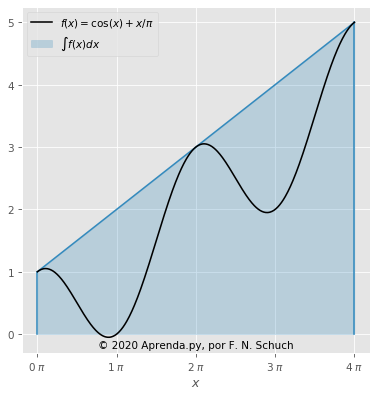

In [4]:
#hide_input
figura(2)

Considerando a função \\( f(x) = \cos(x) + x/\pi \\) no intervalo \\( 0 \le x \le 15 \\), podemos facilmente calcular o valor da integral pelo método do trapézio como:

\\[
\int_0^{4 \pi} f(x)dx \approx \dfrac{1 + 5}{2} (4\pi-0) \approx 37,699.
\\]

Sabe-se, entretanto, que a solução exata é aproximadamente **25,133**. Nossa estimativa passou longe do valor esperado, mas como podemos melhorar isso?

# Trapézio Composto

Bem, podemos melhorar a aproximação para o cálculo do valor da integral ao aumentarmos o número de trapézios, ou ao usar a regra trapezoidal composta. Ela é dada pela equação:

\\[
\int_a^b fdx \approx \sum_{i=0}^{n-1} \dfrac{f_{i} + f_{i+1}}{2} \Delta x = \dfrac{\Delta x}{2} \left( f_1 + 2f_2 + \dots + 2f_{n-1} + f_{n}\right).
\\]

Vamos considerar a mesma função \\( f(x) = \cos(x) + x/\pi \\) no intervalo \\( 0 \le x \le 4 \pi \\). Se considerarmos \\( n = 4 \\), a integral vai representar a área cinza na figura:

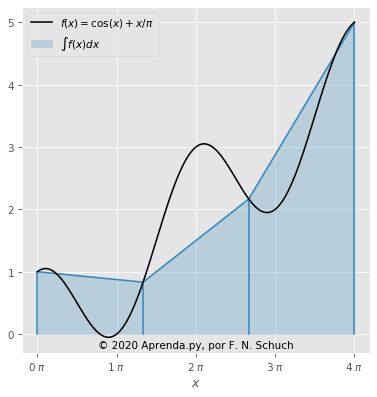

In [5]:
#hide_imput
figura(4)

Melhor, não? Calcular seu valor já não é tão trivial, mas que tal começarmos a por a mão na massa?

In [6]:
import numpy as np #Importamos nossa biblioteca preferida

def f(x): #Transcrevemos a função dada
    return np.cos(x) + x/np.pi

dx = 4*np.pi/3 #Calculamos o dx para esse caso

#E finalmente calculamos a integral
#pelo método trapezoidal composto
dx*(f(0*dx) + 2*f(1*dx) + 2*f(2*dx) + f(3*dx))/2

25.132741228718345

A resposta chegou mais perto. Podemos continuar aumentando o número de pontos empregados para diminuir o erro. Mas mais pontos demandariam muito trabalho com a abordagem que usamos aqui, a equação nem caberia na tela. Vamos automatizar esse processo?

## Implementação

Vamos resolver o método trapezoidal para a mesma função e intervalo, mas agora com ainda mais pontos, que tal \\( n = 21 \\)? A representação visual é essa:

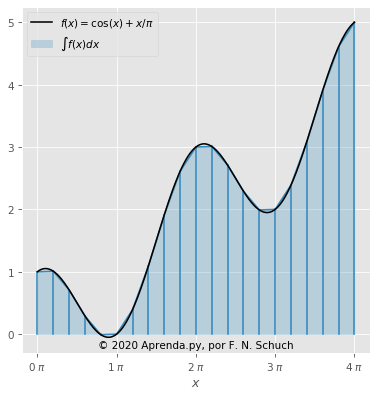

In [7]:
#hide_imput
figura(21)

Vamos ir aumentando o nível de requinte do código, para que ele faça todo o trabalho dessa vez:

In [8]:
#Aqui definimos o intervalo que queremos,
#bem como o número de pontos
x = np.linspace(0, 4*np.pi, num=21)

#
# E é tudo que precisamos,
# o resto é por conta do computador
#

y = f(x) #Nossa função já foi definida no bloco anterior

dx = x[1] - x[0] #Obtem o espaçamento

I = 0. #A operação envolve um somatório, então iniciamos uma variável acumuladora

I += dx*y[0]/2

for i in range(1,x.size-1): #Reflita, por que esse laço vai de 1 até n-1?
    I += dx*y[i]

I += dx*y[-1]/2

print(I) #E finalmente temos o resultado

25.132741228718345


E estamos cada vez mais perto da resposta exata. Nesse ponto, se estiver seguindo essa lição com uma aplicação Python aberta (**o que é altamente recomendado**), aproveite para experimentar diferentes possibilidades, varie os parâmetros, varie a função, veja o que acontece.

> Important: Uma desvantagem dessa abordagem é que o laço `for` vai realizar as operações em série, uma de cada vez, e isso é bem ruim do ponto de vista do desempenho computacional.

> Tip: Caso não conheça a função `np.linspace`, lembre-se que em Python é sempre possível acessar a documentação facilmente, basta digitar `help(np.linspace)`.
{: .notice--info}

## Operador Integral

Após se divertir com os códigos que criamos até aqui, vamos prosseguir nossa escalada no que se refere a elegância. Vamos apresentar nossa integral na forma de um operador matricial. Retorne até a equação da regra trapezoidal composta e dê uma boa olhada. Percebe o padrão? Todos os termos são multiplicados por \\( \Delta x \\), com exceção do primeiro e do último, que são multiplicados por \\( \Delta x / 2 \\). Ora, se isso não tem exatamente a aparência de uma matriz identidade, onde o primeiro e ultimo elemento são divididos por 2, e então todos multiplicados por \\( \Delta x \\), e por fim somados. São muitas palavras, mas não se assuste, a aparência não é tão ruim:

\\[
\int_a^b f(x) dx = \sum_{i=1}^n \big(
W_i f(x_i) \big),
\\]
sendo o operador integral dado por
\\[
W =
\Delta x [
1/2,  1, \dots, 1, \dots, 1, 1/2 ].
\\]

Tendo em vista que a coordenada `x`, a função `y` e o espaçamento da malha `dx` já foram todos definidos nos blocos anteriores, tudo que precisamos agora é definir o nosso operador integral:

In [9]:
#Iniciamos o operador integral como um vetor
#preenchido por 1, multiplicado por dx
Ix = dx*np.ones_like(x)

#Dividimos o primeiro e último elemento por 2
for i in [0, -1]:
    Ix[i] /= 2.0

#A multiplicação do operador pela função e a
#soma dos elementos fornece nossa resposta
np.sum(Ix * y)

25.132741228718345

Nessa opção, após a inicialização, podemos calcular outras integrais apenas repetindo a última linha do código, aumentando a legibilidade e a chance de reutilização do código, e menos linhas para copiar e colar também são um benefício na hora de procurar e corrigir falhas.

> Tip: Todas as operações embutidas nas principais bibliotecas python (como NumPy e SciPy) empregam conceitos de otimização e programação paralela nos bastidores, então são preferíveis por aumentar o desempenho computacional.

## Biblioteca SciPy

Meus parabéns se você chegou até aqui, o último passo. Vamos recapitular, já vimos quatro maneiras diferentes para calcular uma integral:

1. Com a regra simples, a resposta veio de uma simples continha;
2. Ao passar para a regra composta as coisas cresceram, usamos uma calculadora;
3. Vimos como automatizar o cálculo, e foi então possivel experimentar diversas combinações de parâmetros;
4. Então, aumentamos a elegância e resolvemos o problema de forma matricial.

Agora, a última etapa envolve um dos motivos pelo qual Python tem se tornado tão popular: existe uma infinidade de bibliotecas já programadas, prontas para realizar diversas tarefas. De modo que podemos fazer:

In [10]:
from scipy.integrate import trapz
trapz(y,x)

25.132741228718345

Lindo, não? Repare que obtivemos exatamente a mesma resposta para os três últimos exercícios, mostrando que existem diferentes caminhos a serem trilhados. A prática vai lhe permitir escolher entre eles.

Fazemos um destaque à função [scipy.integrate.cumtrapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumtrapz.html), que calcula a integral de forma acumulativa, que pode ser particularmente útil dependendo da aplicação.

### Exemplos

In [11]:
# Um exemplo unidirecional
trapz([1,2,3])

4.0

In [12]:
# Onde podemos informar como argumento
# opcional o sistema de coordenadas
trapz([1,2,3], x=[4,6,8])

8.0

In [13]:
# Ou o espaçamento dos pontos,
# caso seja uniforme
trapz([1,2,3], dx=2)

8.0

In [14]:
# Esse é o exemplo de um caso bidimensional
a = np.arange(6).reshape(2, 3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [15]:
# Integral em x
trapz(a, axis=0)

array([1.5, 2.5, 3.5])

In [16]:
# Integral em y
trapz(a, axis=1)

array([2., 8.])

In [17]:
# Integral dupla: x e então em y
trapz(trapz(a, axis=0), axis=0)

5.0

In [18]:
# Integral dupla: y e então em x
trapz(trapz(a, axis=-1), axis=-1)

5.0

# Bônus: Erro do método

Por fim, podemos ver que o erro do método numérico decresce exponencialmente, na ordem de \\( n^{-2} \\), em função do aumento do número de pontos:

![Regra do Trapézio](https://github.com/fastai/fastpages/raw/master/images/trapezoidal-rule.gif)

Mas ele fica saturado por volta de \\( 10^{-12} \\). É hora da reflexão, você sabe me dizer o que acontece ali?